In [1]:
import pandas as pd
import json

In [2]:
data = pd.read_csv("finances.csv", parse_dates=True)
data[["Date"]] = data[["Date"]].fillna(method="ffill")
data["Date"] = pd.to_datetime(data["Date"])
data.head()

,Date,Item,Price,Card,Notes,TTD
0,2022-08-08,Compass,20.00,ScD,NaN,370.36
1,2022-08-08,Evo,25.40,ScD,Harrison hot springs,NaN
2,2022-08-08,Snackshot,9.40,ScD,NaN,NaN
3,2022-08-08,Harrison Waterpark,45.00,ScD,NaN,NaN
4,2022-08-08,Save on foods,85.28,TDR,NaN,NaN


In [3]:
with open('categories.json', 'r') as f:
    categories = json.load(f)

all_merchants = {i for j in categories.values() for i in j}
print(list(categories.keys()))

['Eating out', 'Groceries', 'Entertainment', 'Transport', 'Misc.', 'Holiday']


In [4]:
flag_merchant = False
for i in data["Item"].unique():
    if i not in all_merchants:
        flag_merchant = True
        print(f"{i} is a new merchant")

if not flag_merchant:
    print("All merchants accounted for")

All merchants accounted for


In [5]:
EATING_OUT_BUDGET = 600
GROCERIES_BUDGET = 600
TRANSPORT_BUDGET = 100
ENTERTAINMENT_BUDGET = 100
MISC_BUDGET = 100
CATEGORY_BUDGETS = {
    "Eating out": EATING_OUT_BUDGET,
    "Groceries": GROCERIES_BUDGET,
    "Transport": TRANSPORT_BUDGET,
    "Entertainment": ENTERTAINMENT_BUDGET,
    "Misc.": MISC_BUDGET
}

In [6]:
data_categories = []
for i in data["Item"]:
    for j in list(categories.keys()):
        if i in categories[j]:
            data_categories.append(j)
            break
data["Category"] = data_categories
data

,Date,Item,Price,Card,Notes,TTD,Category
0,2022-08-08,Compass,20.00,ScD,NaN,370.36,Transport
1,2022-08-08,Evo,25.40,ScD,Harrison hot springs,NaN,Misc.
2,2022-08-08,Snackshot,9.40,ScD,NaN,NaN,Eating out
3,2022-08-08,Harrison Waterpark,45.00,ScD,NaN,NaN,Entertainment
4,2022-08-08,Save on foods,85.28,TDR,NaN,NaN,Groceries
...,...,...,...,...,...,...,...
63,2022-09-04,T&T,254.01,TDR,NaN,NaN,Groceries
64,2022-09-04,Compass,20.00,TDR,NaN,NaN,Transport
65,2022-09-04,Walmart,26.78,TDR,NaN,NaN,Misc.
66,2022-09-05,Amazon,27.97,TDR,NaN,NaN,Misc.


In [7]:
per_category = (
    data.groupby("Category")["Price"].sum()
    .reset_index().rename(columns={"Price": "Total"})
)
per_category

,Category,Total
0,Eating out,613.04
1,Entertainment,56.19
2,Groceries,527.70
3,Holiday,579.76
4,Misc.,2265.13
5,Transport,109.30


In [8]:
category_pies = []
category_text = []
for _, i in per_category.iterrows():
    c = i["Category"]
    if not c == "Holiday":
        t = round(i["Total"], 2)
        b = CATEGORY_BUDGETS[c]
        perc = int(100 * t / b)
        category_pies.append(c)
        text = f"${t} spent out of ${b}"
        category_text.append(text)

In [9]:
data["Month"] = data["Date"].dt.month_name()
data["Year"] = data["Date"].dt.year
data.head()

,Date,Item,Price,Card,Notes,TTD,Category,Month,Year
0,2022-08-08,Compass,20.00,ScD,NaN,370.36,Transport,August,2022
1,2022-08-08,Evo,25.40,ScD,Harrison hot springs,NaN,Misc.,August,2022
2,2022-08-08,Snackshot,9.40,ScD,NaN,NaN,Eating out,August,2022
3,2022-08-08,Harrison Waterpark,45.00,ScD,NaN,NaN,Entertainment,August,2022
4,2022-08-08,Save on foods,85.28,TDR,NaN,NaN,Groceries,August,2022


In [10]:
# data = pd.DataFrame({
#     "Date": ["2022-07-08", "2022-08-08", "2022-08-08", "2022-09-08", "2023-08-08", "2023-09-08"],
#     "Item": ["a", "a", "a", "a", "a", "a"],
#     "Price": [1, 2, 3, 2, 10, 6],
#     "Card": ["a", "a", "a", "a", "a", "a"],
#     "Notes": ["a", "a", "a", "a", "a", "a"],
#     "TTD": ["a", "a", "a", "a", "a", "a"],
#     "Category": ["a", "a", "a", "a", "a", "a"]
# })
# data["Date"] = pd.to_datetime(data["Date"])
# data["Month"] = data["Date"].dt.month_name()
# data["Year"] = data["Date"].dt.year
# data

In [11]:
per_period = (
    data.groupby(by=["Year", "Month"]).sum()
    .reset_index().sort_values(by=["Year", "Month"], ascending=True).tail(5)
)
per_period["Period"] = [
    f"{i} {j}" for i, j in zip(per_period['Month'], per_period['Year'])
][[""]]
per_period

,Year,Month,Price,TTD,Period
0,2022,August,3736.59,370.36,August 2022
1,2022,September,414.53,0.00,September 2022


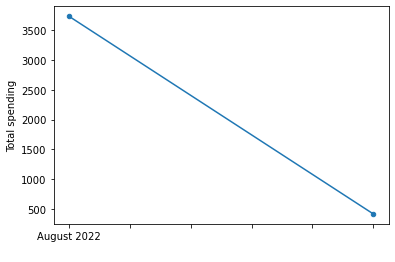

In [12]:
spending_timeline = per_period.plot.line(x="Period", y="Price", legend=False)
per_period.plot.scatter(x="Period", y="Price", legend=False, ax=spending_timeline)
spending_timeline.set_xlabel(" ")
spending_timeline.set_ylabel("Total spending")

spending_timeline.figure.savefig("spending-timeline.png")